# Creating the Game and Getting Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def dict_count(x):
    count = 0
    for i  in (x):
        count += (abs(x[i]-i) + 1)
    return count

def generateDice():
    random_array = np.random.rand(6)
    normalized_array = random_array / sum(random_array)
    return normalized_array

def rollDice(dice):
    return np.random.choice(np.array([1,2,3,4,5,6]), p=dice)

def generateSnakes():
    num_snakes = np.random.randint(1,16)
    snakes = {}
    for i in range(num_snakes):
        top = np.random.randint(2,100)
        while top in snakes:
            top = np.random.randint(2,100)
        bottom = np.random.randint(1,top)
        snakes[top] = bottom
    return snakes

def generateLadders(snakes):
    num_ladders = np.random.randint(1,16)
    ladders = {}
    for i in range(num_ladders):
        bottom = np.random.randint(1,100)
        while bottom in snakes or bottom in ladders:
            bottom = np.random.randint(2,100)    
        top = np.random.randint(bottom,101)
        ladders[bottom] = top
    return ladders

def generateGame():
    dice = generateDice()
    snakes = generateSnakes()
    ladders = generateLadders(snakes)
    playerPos = 0
    return dice, snakes, ladders, playerPos

def turn(dice, snakes, ladders, playerPos, snakes_hit, ladders_hit):
    move = rollDice(dice) + playerPos
    if move in snakes:
        snakes_hit += 1
        return snakes[move], snakes_hit, ladders_hit
    elif move in ladders:
        ladders_hit += 1
        return ladders[move], snakes_hit, ladders_hit
    elif move > 100:
        return playerPos, snakes_hit, ladders_hit
    else:
        return move, snakes_hit, ladders_hit

def runGame():
    dice, snakes, ladders, playerPos = generateGame()
    win = False
    
    num_turns = 0
    num_snakes = len(snakes) # number of snakes on board
    num_ladders = len(ladders) # number of ladders on board
    
    tot_snakes = dict_count(snakes) # total number of tiles that are snakes
    tot_ladders = dict_count(ladders) # total number of tiles that are ladders
    
    snakes_hit = 0
    ladders_hit = 0
    
    while playerPos != 100 and num_turns != 100:
        playerPos, snakes_hit, ladders_hit = turn(dice, snakes, ladders, playerPos, snakes_hit, ladders_hit)
        num_turns +=1 
        
    if playerPos==100:
        win = True
    return num_turns, win, num_snakes, num_ladders, tot_snakes, tot_ladders, snakes_hit, ladders_hit

In [2]:
num_games = 5000
data = np.zeros([num_games, 8])

for i in range(num_games):
    data[i] = runGame()

df = pd.DataFrame(data, columns=['num_turns', 'win', 'num_snakes', 'num_ladders', 
                                 'tot_snakes', 'tot_ladders', 'snakes_hit', 'ladders_hit'])
df

,num_turns,win,num_snakes,num_ladders,tot_snakes,tot_ladders,snakes_hit,ladders_hit
0,21.0,1.0,12.0,14.0,233.0,353.0,5.0,3.0
1,25.0,1.0,11.0,4.0,376.0,159.0,1.0,1.0
2,39.0,1.0,8.0,3.0,266.0,104.0,2.0,1.0
3,100.0,0.0,14.0,4.0,469.0,171.0,15.0,3.0
4,8.0,1.0,6.0,10.0,196.0,231.0,1.0,3.0
...,...,...,...,...,...,...,...,...
4995,47.0,1.0,2.0,2.0,126.0,18.0,1.0,1.0
4996,26.0,1.0,3.0,5.0,88.0,106.0,0.0,1.0
4997,79.0,1.0,12.0,13.0,406.0,272.0,15.0,5.0
4998,16.0,1.0,8.0,14.0,236.0,364.0,0.0,4.0


# Exploratory Data Analysis

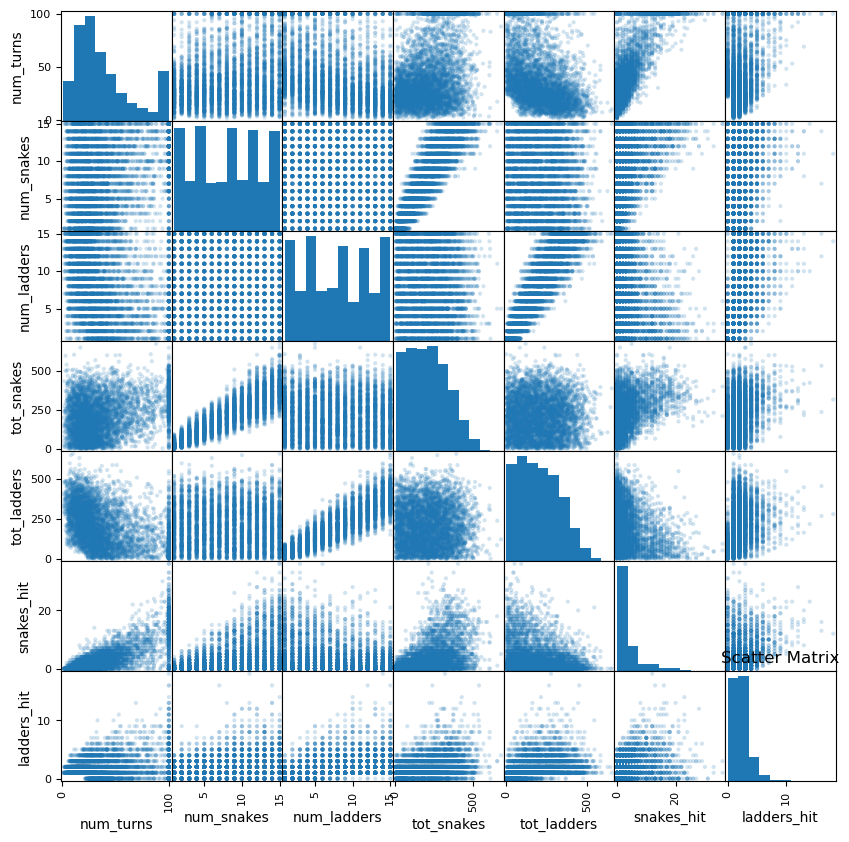

Text(0.5, 1.0, 'Correlation Matrix')

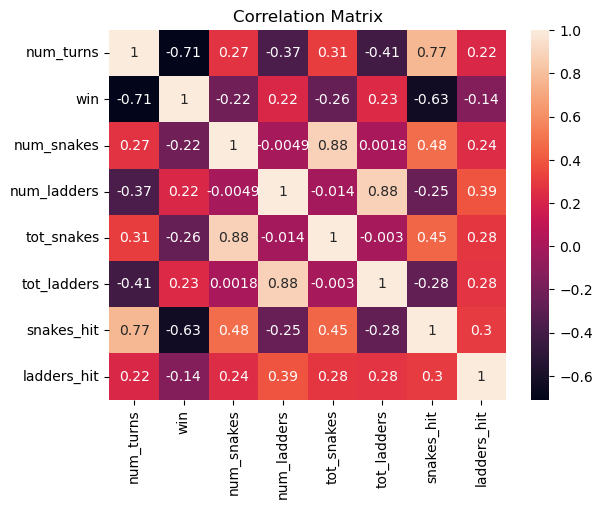

In [13]:
pd.plotting.scatter_matrix(df.drop('win', axis=1), alpha=0.2, diagonal='hist', figsize=(10, 10));
plt.title('Scatter Matrix')
plt.show()
sns.heatmap(df.corr(), annot=True);
plt.title('Correlation Matrix')

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


median shown in blue, mean shown in red


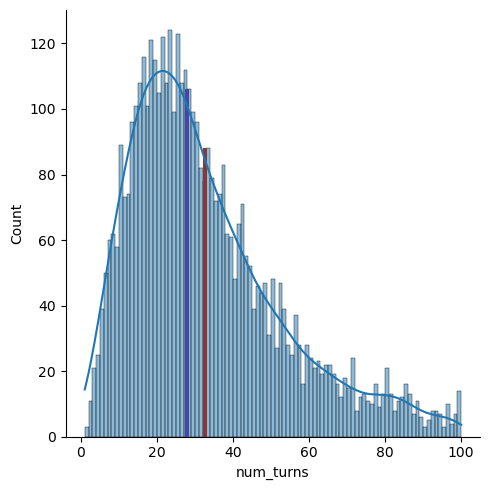

In [4]:
games_lost = df.loc[df['win']==0]
games_won = df.loc[df['win']==1]

sns.displot(games_won['num_turns'], bins= np.arange(int(games_won['num_turns'].max()))+1, kde=True);

#### Plot the median in blue
sns.histplot(x=[games_won['num_turns'].median(), games_won['num_turns'].median()], 
             y=[0,games_won[games_won['num_turns']==games_won['num_turns'].median()]['num_turns'].count()],
            color='blue')

### Plot the mean in red
sns.histplot(x=[games_won['num_turns'].mean(), games_won['num_turns'].mean()], 
             y=[0,games_won[games_won['num_turns'] == round(games_won['num_turns'].mean())]['num_turns'].count()],
            color='red')

print('median shown in blue, mean shown in red')

In [5]:
print('In 5000 Games, the average number of rolls to win was: ' + str(round((df['num_turns'].sum())/(df['win'].count()),1)))
print('\nIn 5000 Games, the win rate was: ' + str(round((df['win'].sum())/(df['win'].count())*100,1)) + '%')
print('\nThe average number of snakes in games lost was ' + str(round(games_lost['num_snakes'].mean(),1)) + 
      ' and the average number of snakes in games won was ' + str(round(games_won['num_snakes'].mean(),1)) +'.')
print('\nMore snakes were hit in games lost than in games won. In games lost, the player hit, on average, ' 
      + str(round(games_lost['snakes_hit'].mean(),1)) + 
      ' snakes, while in games   won the player hit, on average, ' + str(round(games_won['snakes_hit'].mean(),1))  +' snakes.')
print('\nSuprisingly, in games lost, the player hit more ladders than in games won, on average. This is likely explained by' +
     ' the fact    that in games lost, the player likely took more turns, and hence had more opportuntities to hit a ladder.' +
     ' In games lost ' + str(round(games_lost['ladders_hit'].mean(),1)) + '    ladders were hit on average.' + 
     ' In games won ' + str(round(games_won['ladders_hit'].mean(),1)) + ' ladders were hit on average.')
print('\nFrom the scatter matrix we can see that there are more snakes hit when the number of snakes increases' +
     ' similarly for ladders as well.')
print('\nFrom the distribution / histogram plot above, we can see that the num_turns is a right skewed distribution.')

In 5000 Games, the average number of rolls to win was: 38.9

In 5000 Games, the win rate was: 90.8%

The average number of snakes in games lost was 11.0 and the average number of snakes in games won was 7.7.

More snakes were hit in games lost than in games won. In games lost, the player hit, on average, 13.3 snakes, while in games   won the player hit, on average, 2.5 snakes.

Suprisingly, in games lost, the player hit more ladders than in games won, on average. This is likely explained by the fact    that in games lost, the player likely took more turns, and hence had more opportuntities to hit a ladder. In games lost 2.8    ladders were hit on average. In games won 2.0 ladders were hit on average.

From the scatter matrix we can see that there are more snakes hit when the number of snakes increases similarly for ladders as well.

From the distribution / histogram plot above, we can see that the num_turns is a right skewed distribution.


# Data Science

For this part, we are interested in training a model to predict whether a player is likely to win a game based on the game board configuration (i.e., number of snakes/ladders, how many tiles the snakes/ladders occupy). This means, we are building a classifier. We will undergo the usual data science approach by splitting our data set from above into a training and test split. We will use various models and train them using grid_search (i.e., a cross validation approach) to tune the hyper parameters. We will then choose the best model and test its performance on our test data.

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Splitting the data into training and test split
X = df[['num_snakes', 'num_ladders', 'tot_snakes', 'tot_ladders']]
y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
# Creating all the models

# KNN
KNNclf = KNeighborsClassifier() #.fit(X_train, y_train) #n_neighbors

# Logisitic Regression
LogRegclf = LogisticRegression() #.fit(X_train, y_train) # C_param

# Linear Support Vector Machine
LSVMclf = SVC(kernel='linear') #.fit(X_train, y_train) # C_param

# RBF Support Vector Machine
RBFSVMclf = SVC(kernel='rbf') #.fit(X_train, y_train) # gamma, C_param

# Decision Tree
Treeclf = DecisionTreeClassifier() #.fit(X_train, y_train) # max_depth, min_samples_leaf



# Creating parameter grid for all models
KNNclf_params = {'n_neighbors':np.arange(1,30,1)}

LogRegclf_params = {'C': [0.01, 0.1, 1]} 

LSVMclf_params = {'C': [0.01, 0.1, 1]}

RBFSVMclf_params = {'C': [0.01, 0.1], 
                    'gamma': [0.01, 0.1]} 


Treeclf_params = {'max_depth': np.arange(2,10,1),
                  'min_samples_leaf': np.arange(1,30,1)}
                                                           
                                                           
models = [KNNclf, LogRegclf, LSVMclf, RBFSVMclf, Treeclf]     
params = [KNNclf_params, LogRegclf_params, LSVMclf_params, RBFSVMclf_params, Treeclf_params]

In [8]:
# Using GridSearch to find ideal parameters for all models
for i in range(len(models)):
    grid = GridSearchCV(models[i], param_grid = params[i])
    grid.fit(X_train, y_train)
    print('\nModel = ' + str(models[i]))
    print('Grid best parameter(s): ', grid.best_params_)
    print('Grid best score: ', grid.best_score_)


Model = KNeighborsClassifier()
Grid best parameter(s):  {'n_neighbors': 28}
Grid best score:  0.9162666666666667

Model = LogisticRegression()
Grid best parameter(s):  {'C': 0.1}
Grid best score:  0.9136000000000001

Model = SVC(kernel='linear')
Grid best parameter(s):  {'C': 0.01}
Grid best score:  0.9082666666666667

Model = SVC()
Grid best parameter(s):  {'C': 0.01, 'gamma': 0.01}
Grid best score:  0.9082666666666667

Model = DecisionTreeClassifier()
Grid best parameter(s):  {'max_depth': 4, 'min_samples_leaf': 28}
Grid best score:  0.9144


In [9]:
# Checking performance of all models on test set
# Note: in actuality, I would've selected my best model from above.
# In practise, never 'test' multiple models on the test set and use this for model selection as you will overfit.
# Always do model selection and hyperparameter tuning on the training (train + validation) data.
# However, this is just for fun so I checked performance of all models on test set.

from sklearn.metrics import accuracy_score
KNN = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)
LogR = LogisticRegression(C=0.01).fit(X_train, y_train)
Lsvc = SVC(kernel='linear', C=0.01).fit(X_train, y_train)
RBFsvc = SVC(kernel='rbf', C=0.01, gamma=0.01).fit(X_train, y_train)
Tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20).fit(X_train, y_train)

print(
'KNN = ' + str(accuracy_score(y_test,KNN.predict(X_test))) ,
'\nLogR = ' + str(accuracy_score(y_test,LogR.predict(X_test))) ,
'\nLsvc = '+ str(accuracy_score(y_test,Lsvc.predict(X_test))) ,
'\nRBFsvc = '+ str(accuracy_score(y_test,RBFsvc.predict(X_test))) ,
'\nTree = '+ str(accuracy_score(y_test,Tree.predict(X_test))) )

KNN = 0.9184 
LogR = 0.9104 
Lsvc = 0.9064 
RBFsvc = 0.9064 
Tree = 0.9136


Descriptive, predictive, prescriptive. We've covered the descriptive portion in our data analysis section. By training our model, and testing it on unseen data, we've covered prediction. With further queries and questions, we can use or model to gain ideas on the best gameboard configuration to succesfully win in our snakes and ladders game (prescriptive). 